<a href="https://colab.research.google.com/github/Tha-vw/heart_disease/blob/main/MVP_I_Machine_Learning_Analytics_TW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP I - Machine Learning & Analytics**
---

#####Thaiz Wyns
<br>


This notebook is part of the PUC-Rio Postgraduation Course in Data Science & Analytics.
<br><br>
Sprint I: Machine Learning & Analytics.
<br><br>
A comprehensible Classical Machine Learning model will be used to predict as accurate as possible a classification problem.

The steps covered in this Sprint circle around data uploading and preparation, data preprocessing and its split between training and testing, using Feature Selection in a small subset of features, modeling and algorithm tuning. Also, after having trained the models, there will be evaluation and comparison of results.

The use of cross-validation technique and the creation of pipelines to process the model are also part of this project outline.

## Table of contents
1. Heart Disease - Problem definition<br>
    1.1 Some Types of Heart Diseases
2. Data Preparation<br>
    2.1 Dataset Upload<br>
    2.2 Dataset Attributes Description
3. Data Analysis<br>
    3.1 Analysing the Data Variables<br>
    3.2 Analysing the Data through a Combination of Variables
4. Data Preprocessing<br>
   
5. Feature Selection<br>
    5.1 Splitting Training and Testing set with Holdout<br>
    5.2 SelectKBest<br>
    5.3 Recursive Feature Elimination<br>
    5.4 Feature Importance with ExtraTrees
6. Modeling and Inference<br>
    6.1 Creating and Evaluating a baseline model<br>
    6.2 Creating and Evaluating the pipelines<br>
    6.3 Hyperparameters Optimization<br>
    6.4 Model Finalization<br>
    6.5 Prediction for Unseen Data
7. Conclusion
8. Further Considerations

# 1.0 Heart Disease - Problem definition

Heart diseases or Cardiovascular diseases (CVDs) are considered the main cause of death in the world, according to World Health Organization (WHO). This topic has been largely studied and discussed using Machine Learning algorithms and models aiming to improve research and prevention of this type of disease, using data-driven sources.  
<br>
In order to early diagnose the disease,  identify symptoms and the risks for an individual and, thus, offer the right treatment, Machine Learning can provide useful and very accurate insights.   
<br>
For this particular analysis, I will focus on whether or not an individual has a heart disease based on their attributes, as defined in the dataset.
<br><br>

The database used in this analysis comes from the Heart Attack UCI database and was initially comprised of 76 attributes and designed to identify heart disease in patients using Machine Learning algorithms.
<br><br>

In its original form, the target features range from 0 (indicating no presence of heart disease) to 4. Still, I will use the 13 attributes most utilized subset of this database, which are the main traceable ones considered by the UCI repository. The dataset with reduced attributes was uploaded from Kaggle: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data
<br><br>

Another important observation is that the experiments that were carried out with the UCI database were centred in discerning the presence (values 1, 2, 3, or 4 represented as 1) and absence (value 0) of heart disease.
<br><br>

Additionally, some attributes might have higher weight than others, such as 'sex' (unbalanced, being male about 70% of the dataset), 'chest pain' (considered the first and strongest physical sign of the disease in potential) and 'cholesterol' (for the popular articles) and they are likely to have a higher impact in the results. In the location where lower age and cholesterol values cross with higher heart rate values, there is a heightened concentration of positive heart attack samples.

## 1.1 Some Types of Heart Diseases

*   Coronary heart disease
*   Rheumatic heart disease
*   Congenital heart disease
*   Deep vein thrombosis and pulmonary embolism





In [272]:
# Importing image
from IPython.display import Image
Image(url='http://content.health.harvard.edu/wp-content/uploads/2021/09/b0a19e4e-5eaa-491d-8e0c-1e4ae64c9323.jpg')

# 2.0 Data Preparation

Importing available libraries for the classification problem.

## 2.1 Dataset Upload

The dataset was uploaded from a public UCI Machine Learning Repository on to Github.

For a glimpse of how the dataset presents its information, the first and last rows will be displayed as follows.

In [273]:
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import Libraries for Preprocessing Data
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # Visualization and analysis of missing data patterns


# Import Libraries for Supervised Learning Data
import numpy as np
from sklearn.preprocessing import StandardScaler # Padronization
from sklearn.preprocessing import Normalizer # Normalization of rows
from sklearn.preprocessing import MinMaxScaler # Scale each feature to a given range
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Prepare folds for cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # Evaluate a score by cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif # for ANOVA test - Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score # Accuracy of the model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Logistic Regression for Recursive Feature Elimination algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [274]:
# Dataset URL
url_data = "https://raw.githubusercontent.com/Tha-vw/heart_disease/main/heart_disease_cleveland_upload.csv"

# Read the file
heart_disease = pd.read_csv(url_data)

# Show the first rows of the dataset
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [275]:
# Show the last rows of the dataset
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [276]:
# Show a glimpse of the dataset - random sample
heart_disease.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
243,55,0,3,128,205,0,1,130,1,2.0,1,1,2,1
105,57,1,2,150,126,1,0,173,0,0.2,0,1,2,0
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
15,52,1,0,118,186,0,2,190,0,0.0,1,0,1,0
44,54,0,1,132,288,1,2,159,1,0.0,0,1,0,0


In [277]:
# Show the dataset type
print(type(heart_disease))

<class 'pandas.core.frame.DataFrame'>


## 2.2 Dataset Attributes Description

The attributes of the dataset are described as per list below:


1. age: age of the patient in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   
   - Value 0: typical angina

   - Value 1: atypical angina

   - Value 2: non-anginal pain

   - Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholesterol in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
 - Value 0: upsloping
 - Value 1: flat
 - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversible defect
14. condition: the predicted attribute (0 = no disease, 1 = disease)

# 3.0 Data Analysis

In [278]:
# Check for null values
heart_disease.isnull().any()

age          False
sex          False
cp           False
trestbps     False
chol         False
fbs          False
restecg      False
thalach      False
exang        False
oldpeak      False
slope        False
ca           False
thal         False
condition    False
dtype: bool

In [279]:
# Show the size and dimension of the dataset. First number is the rows and second the columns
print(heart_disease.shape)

(297, 14)


In [280]:
# Show some of the dataset information, such as what is displayed in the columns
print(heart_disease.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [281]:
# Dataset statistics summary (mean, standard deviation, minimum, maximum and quartiles (Q1, Q2, Q3)) and its need to be scaled
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [282]:
# Checking for duplicates, null in the sample subset
def basic_EDA(heart_disease):
    size = heart_disease.shape
    sum_duplicates = heart_disease.duplicated().sum()
    sum_null = heart_disease.isnull().sum().sum()
    is_NaN = heart_disease. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = heart_disease[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / heart_disease.shape[0])*100))

In [283]:
basic_EDA(heart_disease)

Number of Samples: 297,
Number of Features: 14,
Duplicated Entries: 0,
Null Entries: 0,
Number of Rows with Null Entries: 0 0.0%


In [284]:
# A quick look at the dataset for the binary entries

heart_disease.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
174,64,1,3,120,246,0,2,96,1,2.2,2,1,0,1
132,47,1,2,138,257,0,2,156,0,0.0,0,0,0,0
196,61,1,3,140,207,0,2,138,1,1.9,0,1,2,1
79,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
181,63,0,3,108,269,0,0,169,1,1.8,1,2,0,1
62,42,1,1,120,295,0,0,162,0,0.0,0,0,0,0
165,67,0,3,106,223,0,0,142,0,0.3,0,2,0,0
286,43,1,3,110,211,0,0,161,0,0.0,0,0,2,0
151,39,1,2,140,321,0,2,182,0,0.0,0,0,0,0
275,45,1,3,104,208,0,2,148,1,3.0,1,0,0,0


## 3.1 Analysing the Data Variables

In [285]:
# Analysing the feature target 'condition'

heart_disease["condition"].describe()

count    297.000000
mean       0.461279
std        0.499340
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: condition, dtype: float64

In [286]:
heart_disease["condition"].unique()

array([0, 1])

In [287]:
# Verifying correlation amongst the attributes. Chol and fbs present small correlation in regards to 'condition', whereas the rest are +0.1. We will see further the Correlation Matrix.

print(heart_disease.corr()["condition"].abs().sort_values(ascending=False))

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
thalach      0.423817
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
Name: condition, dtype: float64


Our feature target 'Condition' has a nearly balanced distribution of individuals with heart disease and individuals without it.

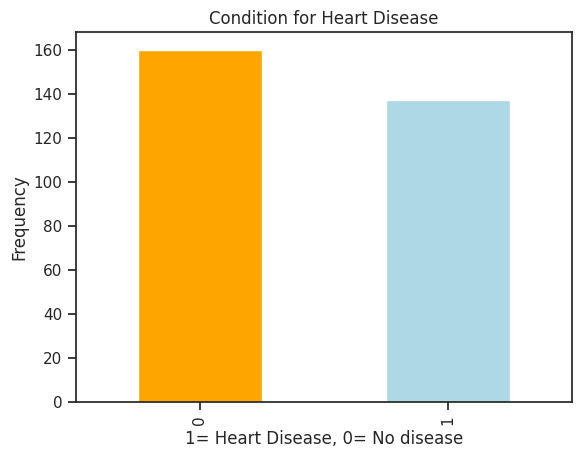

In [288]:
def show_data(col,kind,xlabel,title):
    heart_disease[col].value_counts().plot(kind=kind,color=["orange","lightblue"]);
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()
show_data("condition","bar","1= Heart Disease, 0= No disease","Condition for Heart Disease")

Individuals with the disease tend to present high heart rate, varying greatly in age groups. It is possible to note outliers in terms of high heart rate being healthy and low heart rate showing heart disease.

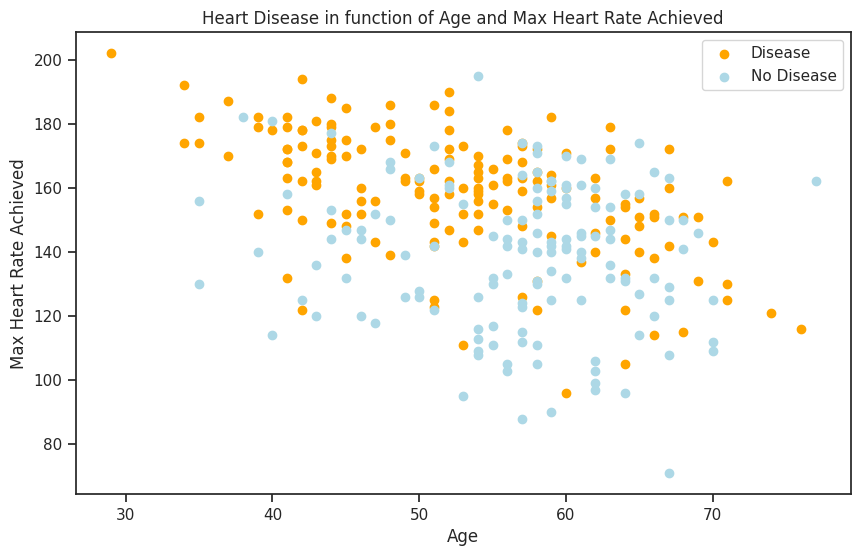

In [289]:
# A quick look at the variables 'age' and 'heart rate achieved'

plt.figure(figsize=(10,6))

# Positive examples
plt.scatter(heart_disease.age[heart_disease.condition==0],
            heart_disease.thalach[heart_disease.condition==0],
            c="orange")

# Negative examples
plt.scatter(heart_disease.age[heart_disease.condition==1],
            heart_disease.thalach[heart_disease.condition==1],
            c="lightblue") # axis always come as (x, y)

plt.title("Heart Disease in function of Age and Max Heart Rate Achieved")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate Achieved");

The variable for gender seems unbalanced with a greater number of males being analysed. For the heart disease condition, it is shown males have a extreme large number of cases.

In [290]:
# A quick look at the variable 'sex' and the feature 'condition'

heart_disease["sex"].value_counts()


sex
1    201
0     96
Name: count, dtype: int64

In [291]:

heart_disease["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [292]:
# Compare 'condition' feature with 'sex' using the contingency table

pd.crosstab(heart_disease["condition"], heart_disease["sex"])


sex,0,1
condition,,
0,71,89
1,25,112


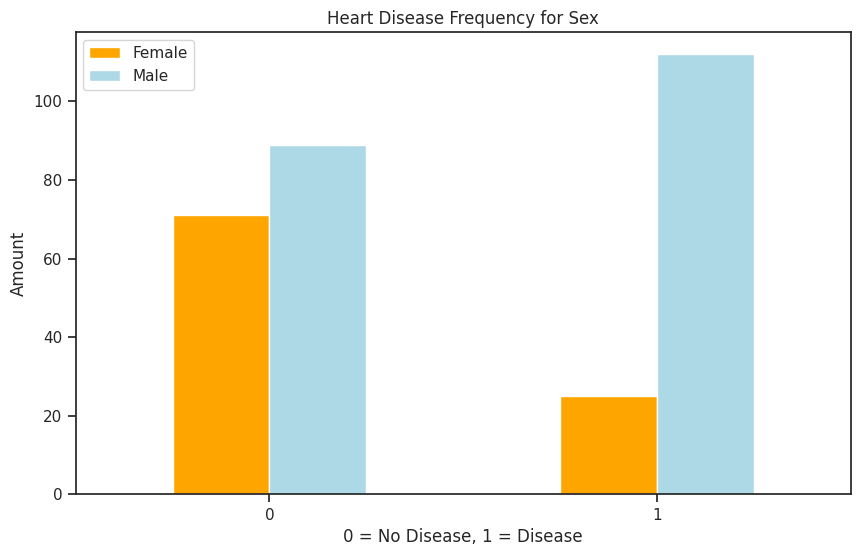

In [293]:
pd.crosstab(heart_disease.condition, heart_disease.sex).plot(kind="bar",figsize=(10, 6),color=["orange", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

Individuals with the disease tend to present high cholesterol level, varying greatly in age groups. It is possible to note outliers in terms of cholesterol rate being healthy and low cholesterol rate showing heart disease.

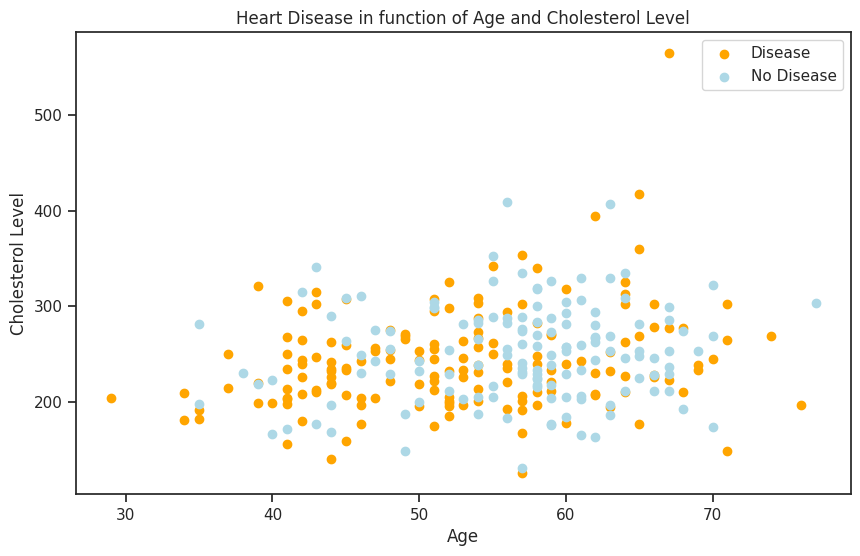

In [294]:
# A quick look at the variables 'age' and 'cholesterol level'
plt.figure(figsize=(10,6))

# Positve examples
plt.scatter(heart_disease.age[heart_disease.condition==0],
            heart_disease.chol[heart_disease.condition==0],
            c="orange")

# Negative examples
plt.scatter(heart_disease.age[heart_disease.condition==1],
            heart_disease.chol[heart_disease.condition==1],
            c="lightblue")

plt.title("Heart Disease in function of Age and Cholesterol Level")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Cholesterol Level");

Now let us take a look at age and gender related to our feature target 'Condition' below. Male individuals are far more exposed to heart diseases than the female ones, being males more susceptible between the ages of 52 and 59. The pick of the heart disease seems to happen at the ages of 57 and 59.

It is interesting to note that at the age of 44 there is an isolated pick.

Females individuals, on the other hand, are more susceptible for heart disease between the ages of 58 and 62.

Let us keep in mind that the female and male samples in this dataset is not equally distributed.

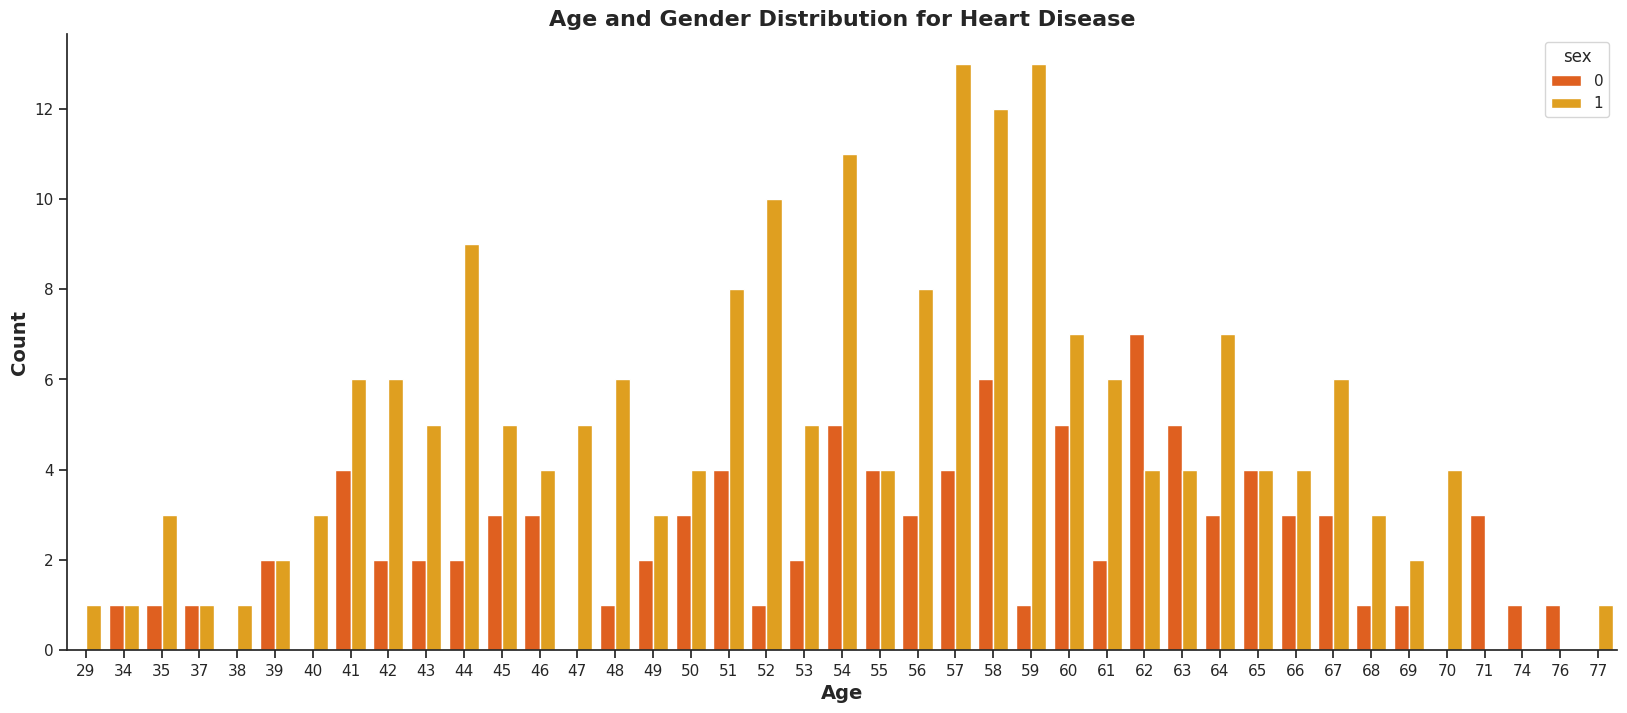

In [295]:
heartCondition = heart_disease[heart_disease['condition']==1]
plt.figure(figsize=(20,8))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = heart_disease,x='age',palette="autumn", hue = 'sex')
sns.despine(top=True, right=True, left=False, bottom=False)
ax.set_xlabel('Age',fontsize = 14,weight = 'bold')
ax.set_ylabel('Count',fontsize = 14,weight = 'bold')
plt.title('Age and Gender Distribution for Heart Disease', fontsize = 16,weight = 'bold');

## 3.2 Analysing the Data through a Combination of Variables

Since our data is small but yet shows many variables with possible correlation amongst them, let us use the Correlation Matrix, which might help us infer potential trends.

Where we see the diagonals the variable will be correlating with itself, which is always equal to 1.

A value close to 1.0 shows a strong positive correlation, i.e. if the value of one variable increases, the value of the other variable increases too.

Also, a value close to -1.0 denotes a strong negative correlation, i.e. if the value of one variable decreases, the other variable increases, and vice-versa.

However, if the value is close to 0 (zero), it shows the absence of correlation between the variables, which means the variables work independently of each other.

In the heatmap below we can see that 'thal' has a strong positive contribution to our target feature 'condition'. Also, 'slope' and 'oldpeak' have a strong positive correlation.

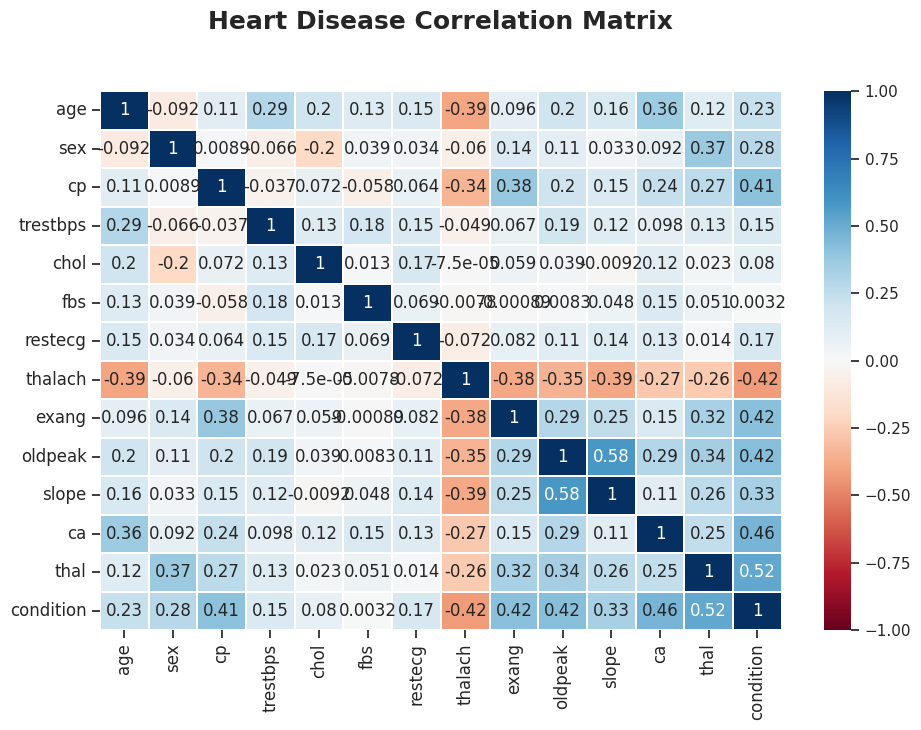

In [296]:
# Seaborn Correlation Matrix

fig, ax = plt.subplots(figsize=(11, 7), dpi=100)
ax.set_title("Heart Disease Correlation Matrix", fontsize=18, fontweight='bold', y=1.1)
sns.heatmap(heart_disease.corr(), annot=True, cmap='RdBu', linewidths=0.3, ax=ax, vmin=-1, vmax=1);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 4.0 Data preprocessing

Data preprocessing is crucial in order to see if there are missing values, errors or any element that will make the prediction less accurate. Apparentely, there are no missing or duplicated values, as observed in the section 2.2.

However, it was remarked a small number of outliers in terms of low heart rate with heart disease. We might as well identify those columns and disregard them.

In [297]:
heart_disease1=heart_disease.copy()
cols=heart_disease1[heart_disease1["condition"]==1]
cols=heart_disease1[heart_disease1["thalach"]<100]

In [298]:
cols

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
91,62,0,2,130,263,0,0,97,0,1.2,1,1,2,1
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
164,67,1,3,120,237,0,0,71,0,1.0,1,0,0,1
174,64,1,3,120,246,0,2,96,1,2.2,2,1,0,1
187,62,1,3,120,267,0,0,99,1,1.8,1,2,2,1
210,59,1,3,164,176,1,2,90,0,1.0,1,2,1,1
226,57,1,3,152,274,0,0,88,1,1.2,1,1,2,1
252,53,1,3,123,282,0,0,95,1,2.0,1,2,2,1


In [299]:
## Removing 33 columns with low heart rate presenting heart disease

heart_disease1.drop([91,95,164,174,187,210,226,252],axis="index",inplace=True)

In [300]:
heart_disease1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


Original dataset to show categorical and numerical features.

In [301]:
categorical_feat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
cat_title = ['Gender','Chest Pain Type','Fasting Blood Sugar > 120 mg/dl',
         'Resting ECG','Exercise Induced Angina','Slope of ST Exercise',
         'Number of Vessels Colored','Thalassemia' ]

numerical_feat = ['age','trestbps','chol','thalach','oldpeak']
num_title = ['Age', 'Resting Blood Pressure','Cholesterol','Max. Heart Rate', 'ST Depression Induced by Exercise']

In [302]:
heart_disease_cat_feat = ["Sex", "CP", "FBS", "Restecg", "Exang", \
                                   "Slope", "Ca", "Thal"]

heart_disease_num_feat = ["Age", "Trestbps","Chol","Thalach", "Oldpeak"]


A Boxplot with high heart rate data.

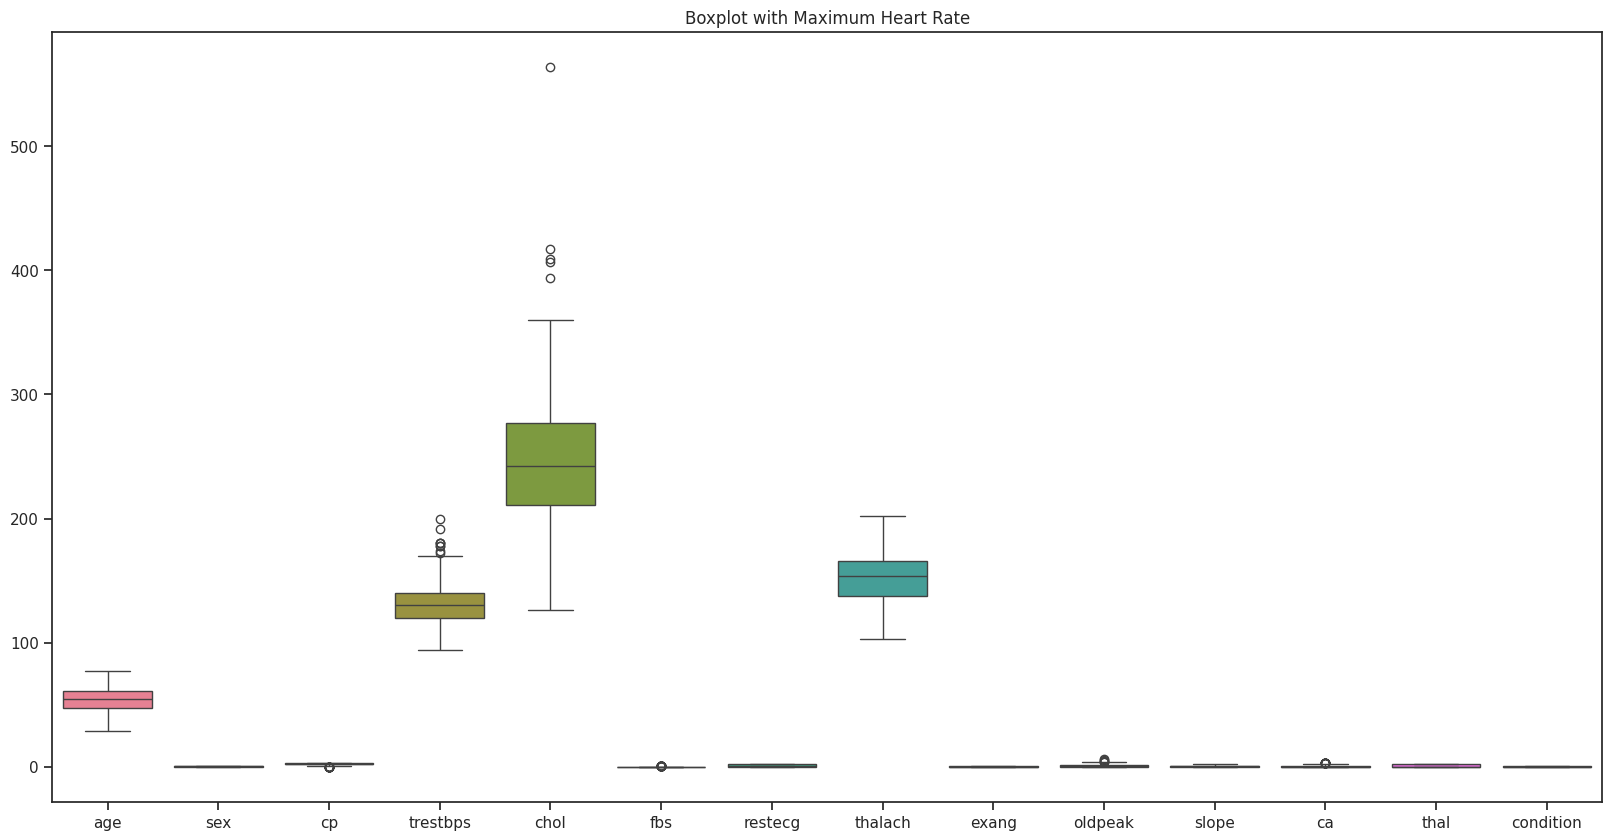

In [303]:
plt.figure(figsize=(20,10))
sns.boxplot(data=heart_disease1)
plt.title("Boxplot with Maximum Heart Rate")
plt.show()

In [304]:
heart_disease2 = heart_disease1.copy()

Another look at the features correlation using the treated data. There is no strong correlation being show in the heatmap below, i.e. the variables present values close to zero. For this reason, there will be no transformation of data and all the variables will remain the same.  

(14.5, -0.5)

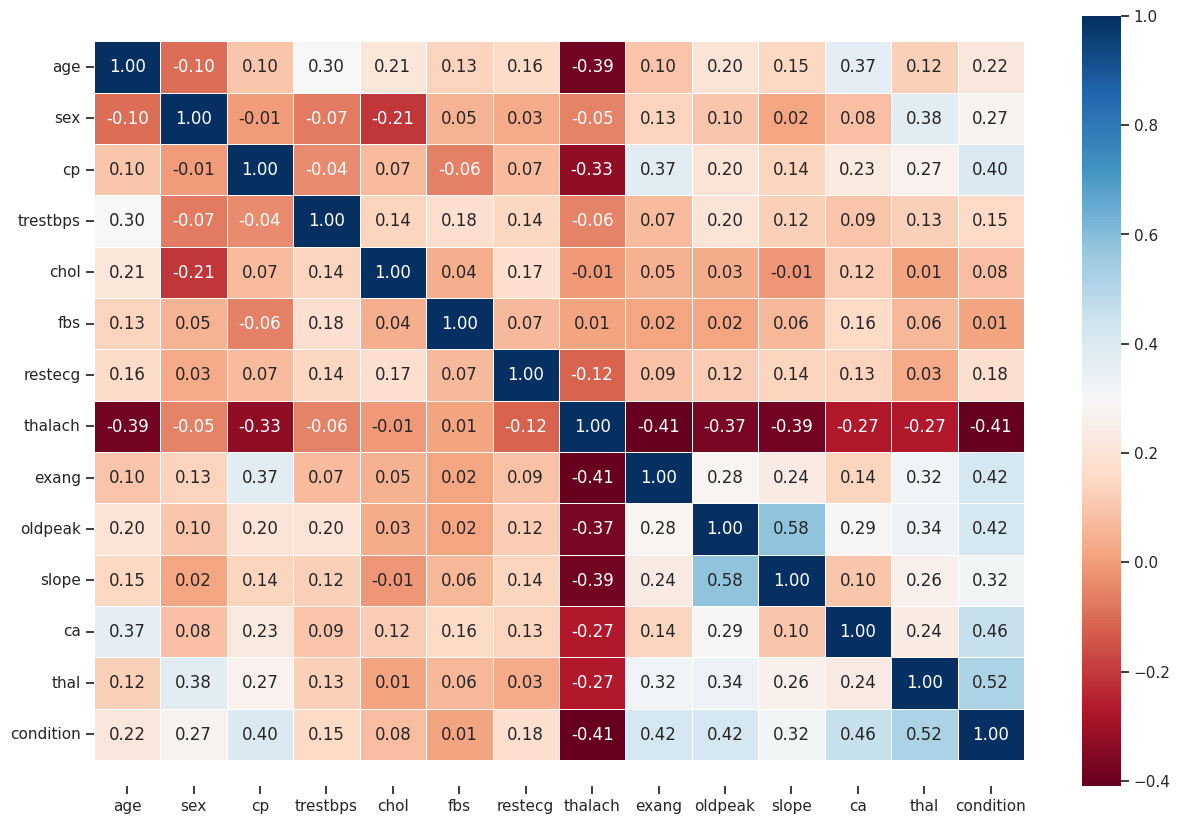

In [305]:
corr_matrix = heart_disease2.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 5.0 Feature Selection


## 5.1 Splitting Training and Testing set with Holdout

Splitting our training and testing data will serve to evaluate how well our supervised models generalize, i.e. we will look at data that has not been looked over previously in the training phase.
We will be using the stratified splitting due to the small nature of our dataset. By doing this, we will keep the original class proportion of our data in both the testing and training sets.

In [306]:
test_size = 0.20 # test size
seed = 7 # random seed

# Training and Testing split
array = heart_disease2.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # stratified holdout

# Cross validation params
scoring = 'accuracy'
num_partitions = 10
kfold = StratifiedKFold(n_splits=num_partitions, shuffle=True, random_state=seed)

In [307]:
print("Shuffling the Training and Testing Data")
print(y_train)
print(y_test)

Shuffling the Training and Testing Data
[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]
[0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]


A quick look again at the correlation matrix so that we can recap and compare how strong the variables correlate to each other after having gone through feature selection methods. Feature selection might help reduce overfitting and the training interval as well as improve the results of the model.

(14.5, -0.5)

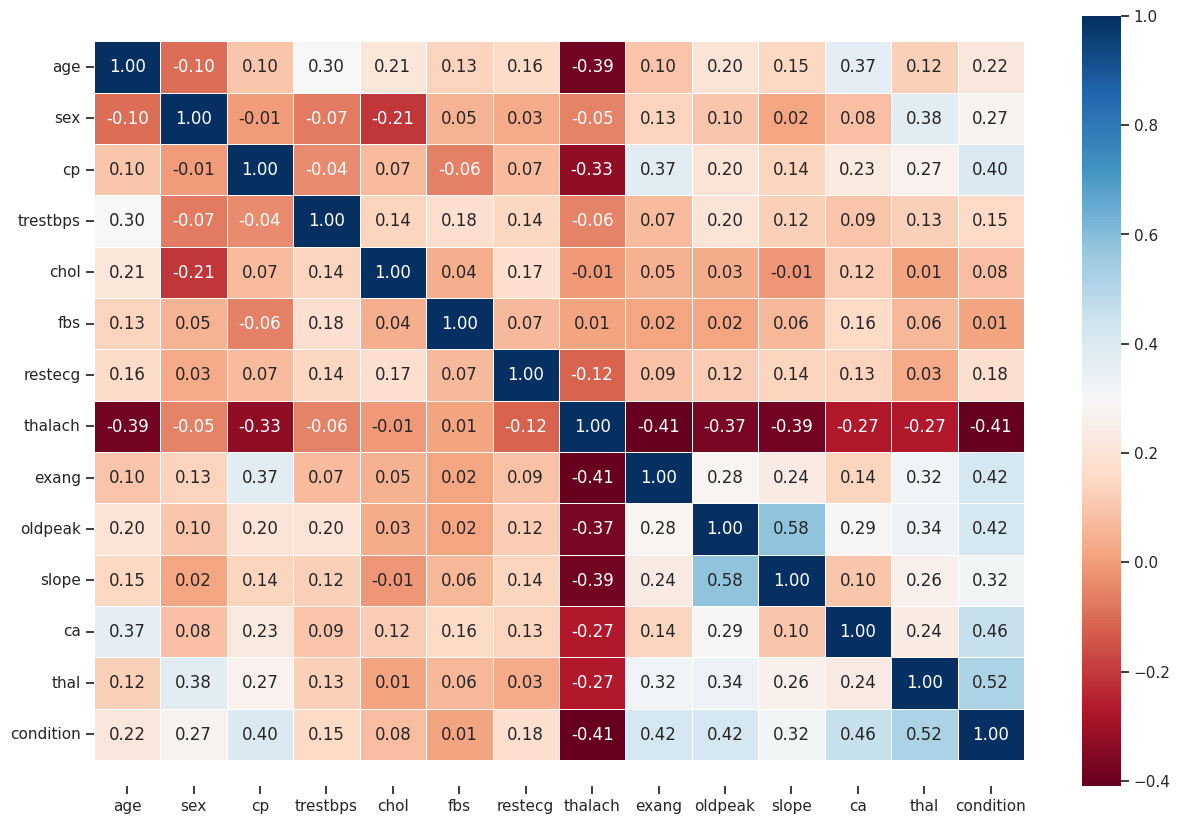

In [308]:
corr_matrix = heart_disease2.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Now we can split the Y and X values. For the feature selection we will use the following methods: SelectKBest (Keeps the K highest scoring features), Recursive Feature Elimination with logistic regression algorithm and Feature Importance with ExtraTrees Classifier.
For each selection, the result of X will be stored separately in variables to be tested during the modeling phase: X_selected_SKB for SelectKBest, X_selected_ERL for Recursive Feature Elimination and X_selected_IAE for Feature Importance with ExtraTrees.

In [309]:
# Splitting the dataset output values of X
heart_disease2_x_atributes = heart_disease2.values[:,0:13]

# Splitting the dataset output values of Y
heart_disease2_y_condition = heart_disease2.values[:,13]

## 5.2 SelectKBest

In [310]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Feature Selection with SelectKBest
best_var = SelectKBest(score_func=mutual_info_classif, k=6)

# Runs the scorer function in (X, y) and receive the selected features
fit = best_var.fit(X, y)

# Reduce X to the selected features
features = fit.transform(X)

# Results
print('\nOriginal Number of Features:', X.shape[1])
print('\nReduced Number of Features:', features.shape[1])

# Displaying the original features
print("\nOriginal Features:", heart_disease2.columns[0:13])

# Displaying the score for each feature and 6 chosen ones (from the highest)
np.set_printoptions(precision=3) # 3 decimals
print("\nOriginal Features Scores:", fit.scores_)
print("\nSelected Features:", best_var.get_feature_names_out(input_features=heart_disease2.columns[0:13]))


Original Number of Features: 13

Reduced Number of Features: 6

Original Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Original Features Scores: [0.018 0.01  0.172 0.    0.078 0.    0.011 0.077 0.095 0.037 0.115 0.118
 0.121]

Selected Features: ['cp' 'chol' 'exang' 'slope' 'ca' 'thal']


## 5.3 Recursive Feature Elimination

In [311]:
# Recursive Feature Elimination with logistic regression

# Creating the Model
model = LogisticRegression(max_iter=50)

# Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=6)
fit = rfe.fit(X, y)

# Reduce X for the selected features
X_selected_ERA = fit.fit_transform(heart_disease2_x_atributes, heart_disease2_y_condition)

# Display the results
print("Original Features:", heart_disease2.columns[0:13])

# Display the selected features (set as True in "Selected Features"
# and as 1 in "Feature Ranking")
print("\nSelected Features: %s" % fit.support_)
print("\nFeature Ranking: %s" % fit.ranking_)
print("\nNum of Best Features: %d" % fit.n_features_)
print("\nSelected Features Labels: %s" % fit.get_feature_names_out(input_features=heart_disease2.columns[0:13]))

Original Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Selected Features: [False  True False False False  True False False  True False  True  True
  True]

Feature Ranking: [6 1 2 7 8 1 4 5 1 3 1 1 1]

Num of Best Features: 6

Selected Features Labels: ['sex' 'fbs' 'exang' 'slope' 'ca' 'thal']


Creating and Evaluating the pipelines, using standardized and normalized data (to avoid data leakage):

LR-orig: 0.831 (0.056)
KNN-orig: 0.679 (0.089)
CART-orig: 0.714 (0.066)
NB-orig: 0.849 (0.058)
SVM-orig: 0.636 (0.082)
Bag-orig: 0.810 (0.059)
RF-orig: 0.827 (0.072)
ET-orig: 0.814 (0.080)
Ada-orig: 0.792 (0.052)
GB-orig: 0.792 (0.053)
Vot-orig: 0.792 (0.043)
LR-padr: 0.818 (0.066)
KNN-padr: 0.844 (0.047)
CART-padr: 0.710 (0.062)
NB-padr: 0.849 (0.058)
SVM-padr: 0.857 (0.061)
Bag-padr: 0.814 (0.051)
RF-padr: 0.831 (0.063)
ET-padr: 0.801 (0.080)
Ada-padr: 0.792 (0.052)
GB-padr: 0.792 (0.053)
Vot-padr: 0.844 (0.058)
LR-norm: 0.818 (0.056)
KNN-norm: 0.806 (0.060)
CART-norm: 0.714 (0.068)
NB-norm: 0.849 (0.058)
SVM-norm: 0.844 (0.055)
Bag-norm: 0.822 (0.071)
RF-norm: 0.814 (0.087)
ET-norm: 0.805 (0.080)
Ada-norm: 0.792 (0.052)
GB-norm: 0.792 (0.053)
Vot-norm: 0.818 (0.050)


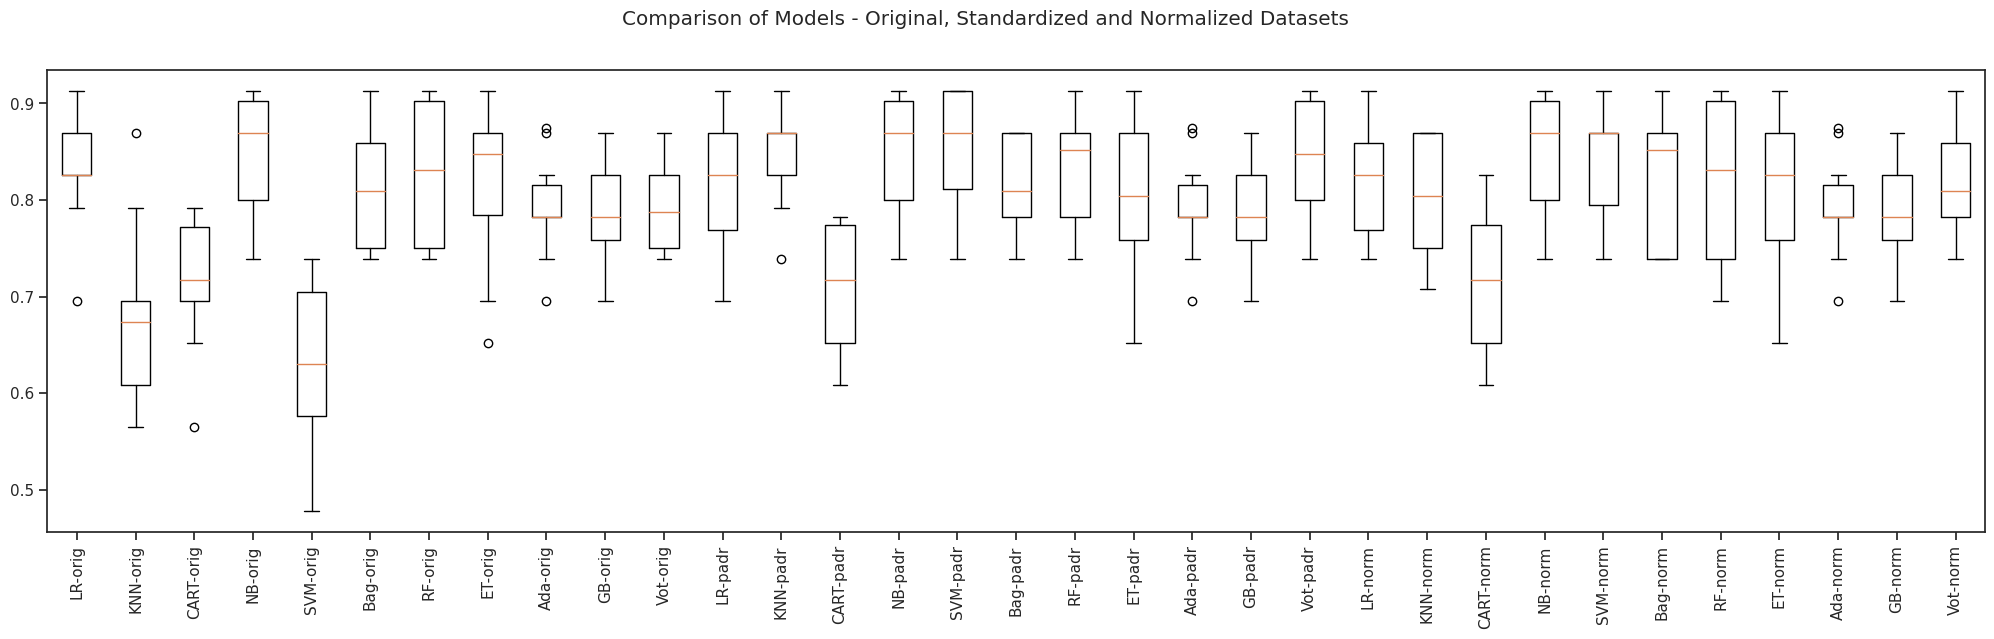

In [312]:

np.random.seed(seed) # defining a global seed

# Lists to store the pipeplines and their results
pipelines = []
results = []
names = []

base = DecisionTreeClassifier()
num_trees = 100
max_features = 6

# Creating VotingClassifier models
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating the pipeline elements

# Algorithms to be applied
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformations to be applied
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Building up the pipelines

# Original Dataset
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Standardized Dataset
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalized Dataset (minimizing errors and inconsistencies)
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executing the pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatting for 3 decimals
    print(msg)

# Boxplot - Comparison of Models
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparison of Models - Original, Standardized and Normalized Datasets')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## 5.4 Feature Importance with ExtraTrees

In [313]:
# Feature Importance with ExtraTrees Classifier

# Creating the model for Feature Selection
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)

importances = model.feature_importances_
threshold = 0.009  # Limit of importance for the selection

# Reduce X for the selected features
mask = importances > threshold
X_selected_IAE = heart_disease2_x_atributes[:, mask]

# Displaying the original features
print("\nOriginal Features:", heart_disease2.columns[0:13])

# Displaying the score importance for each feature (the higher the score, the higher the feature importance)
print(model.feature_importances_)


Original Features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[0.073 0.044 0.092 0.059 0.059 0.022 0.035 0.083 0.089 0.081 0.057 0.144
 0.165]


For the feature selection, I have considered the ranking of the Feature Importance with ExtraTrees method to be able to choose the number of features for the other methods. I have tested K and n_features_to_select from 5 to 7 in SelectKBest and Recursive Feature Elimination respectively, being 6 the most relevant number of features.

The best features: Thal, Ca, Chest Pain, Chol, Exang, OldPeak.

There are studies indicating Cholesterol as an attribute related to Heart Diseases, however, for this project and dataset, the ranking for Cholesterol was low (compared to the other features) according to ExtraTrees Importance. On the other hand, SelectKBest scored Cholesterol high enough and it was included to our feature selection.  

Other changes and readjustments were made in the max_iter parameters in recursive elimination starting from 50 going up to 200 and back to 50. Also, in the n_estimators of ExtraTrees I started at 100, went up to 500 and back to 100, which seemed stable.

Due to the nature of our dataset being of categorial and numerical, the mutual_info_classific in SelectKBest is the most suitable for the purpose of our scoring results.

# 6.0 ML Modeling and Inference


Now it is time to create the Machine Learning models and inferences, evaluating them referring to the baseline, pipeline, the standardized and normalized data.

However, we do not know in advance which algorithms will perform best using our dataset. Therefore, we will use cross-validation to train and evaluate the models using the “accuracy” metric.

We create the ensembles, add them to the list of models, and after having compared the models and found the one with best performance, we will follow with the hyperparameters optimization.




## 6.1 Creating and Evaluating a baseline model

LR: 0.831341 (0.055816)
KNN: 0.679167 (0.088507)
CART: 0.713949 (0.066089)
NB: 0.848732 (0.058193)
SVM: 0.636051 (0.081680)
Bagging: 0.809601 (0.058638)
RF: 0.826993 (0.072261)
ET: 0.813949 (0.079990)
Ada: 0.791848 (0.051562)
GB: 0.792391 (0.053350)
Voting: 0.792210 (0.042501)


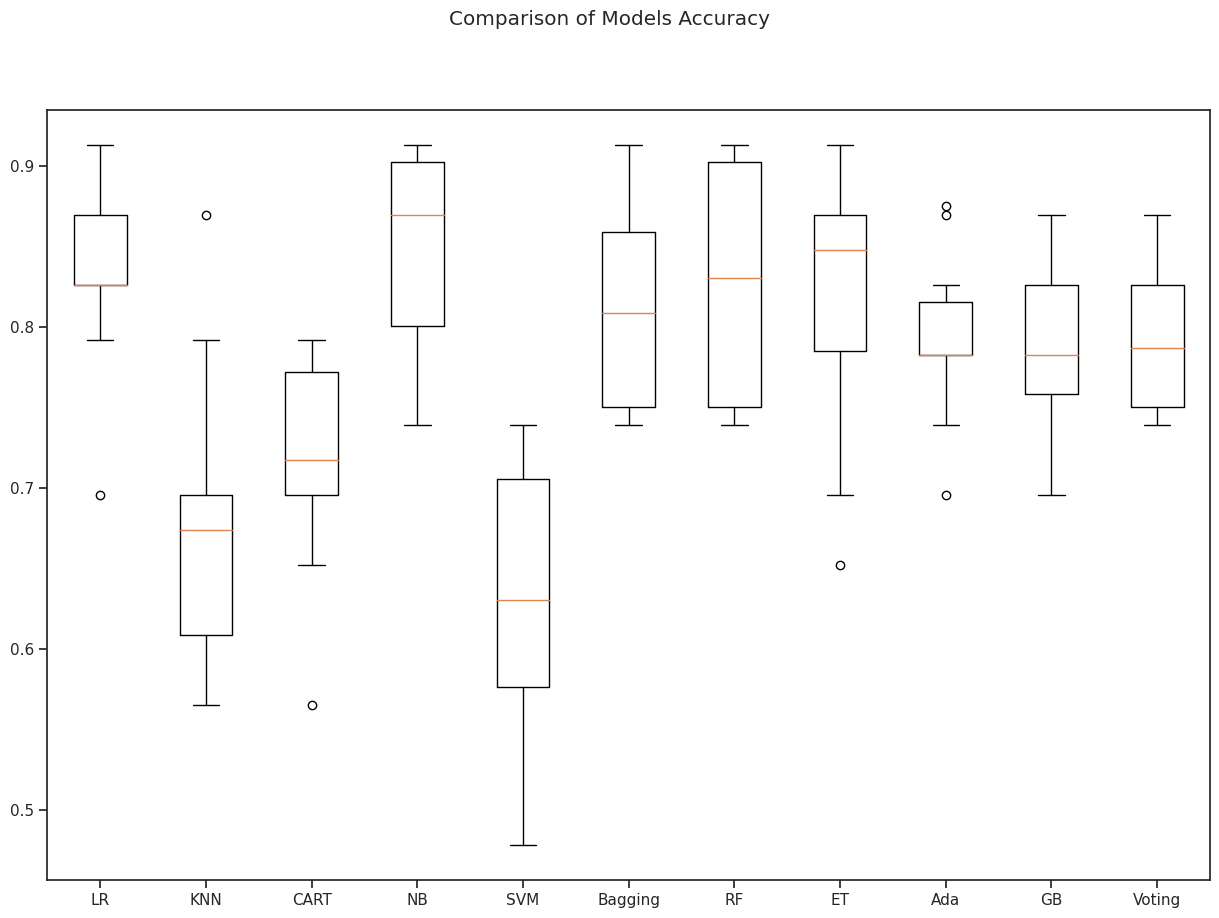

In [314]:
np.random.seed(seed)

models = []

models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# BaggingClassifier base params
base = DecisionTreeClassifier()
num_trees = 100
max_features = 6

# VotingClassifier models
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating ensembles and adding them to the models
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Lists to store the results
results = []
names = []

# Models evaluation
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot - Comparison of Models Accuracy
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparison of Models Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

For the selected data, the algorithm NB (Naïve Bayes) displayed the best realistic performance at 84.8%, being almost as good the LR (Logistic Regression) reaching 83.1%.

## 6.2 Creating and Evaluating the pipelines

Using standardized and normalized data to avoid data leakage, manage consistency and reproducibility.

LR-orig: 0.831 (0.056)
KNN-orig: 0.679 (0.089)
CART-orig: 0.714 (0.066)
NB-orig: 0.849 (0.058)
SVM-orig: 0.636 (0.082)
Bag-orig: 0.810 (0.059)
RF-orig: 0.827 (0.072)
ET-orig: 0.814 (0.080)
Ada-orig: 0.792 (0.052)
GB-orig: 0.792 (0.053)
Vot-orig: 0.792 (0.043)
LR-padr: 0.818 (0.066)
KNN-padr: 0.844 (0.047)
CART-padr: 0.710 (0.062)
NB-padr: 0.849 (0.058)
SVM-padr: 0.857 (0.061)
Bag-padr: 0.814 (0.051)
RF-padr: 0.831 (0.063)
ET-padr: 0.801 (0.080)
Ada-padr: 0.792 (0.052)
GB-padr: 0.792 (0.053)
Vot-padr: 0.844 (0.058)
LR-norm: 0.818 (0.056)
KNN-norm: 0.806 (0.060)
CART-norm: 0.714 (0.068)
NB-norm: 0.849 (0.058)
SVM-norm: 0.844 (0.055)
Bag-norm: 0.822 (0.071)
RF-norm: 0.814 (0.087)
ET-norm: 0.805 (0.080)
Ada-norm: 0.792 (0.052)
GB-norm: 0.792 (0.053)
Vot-norm: 0.818 (0.050)


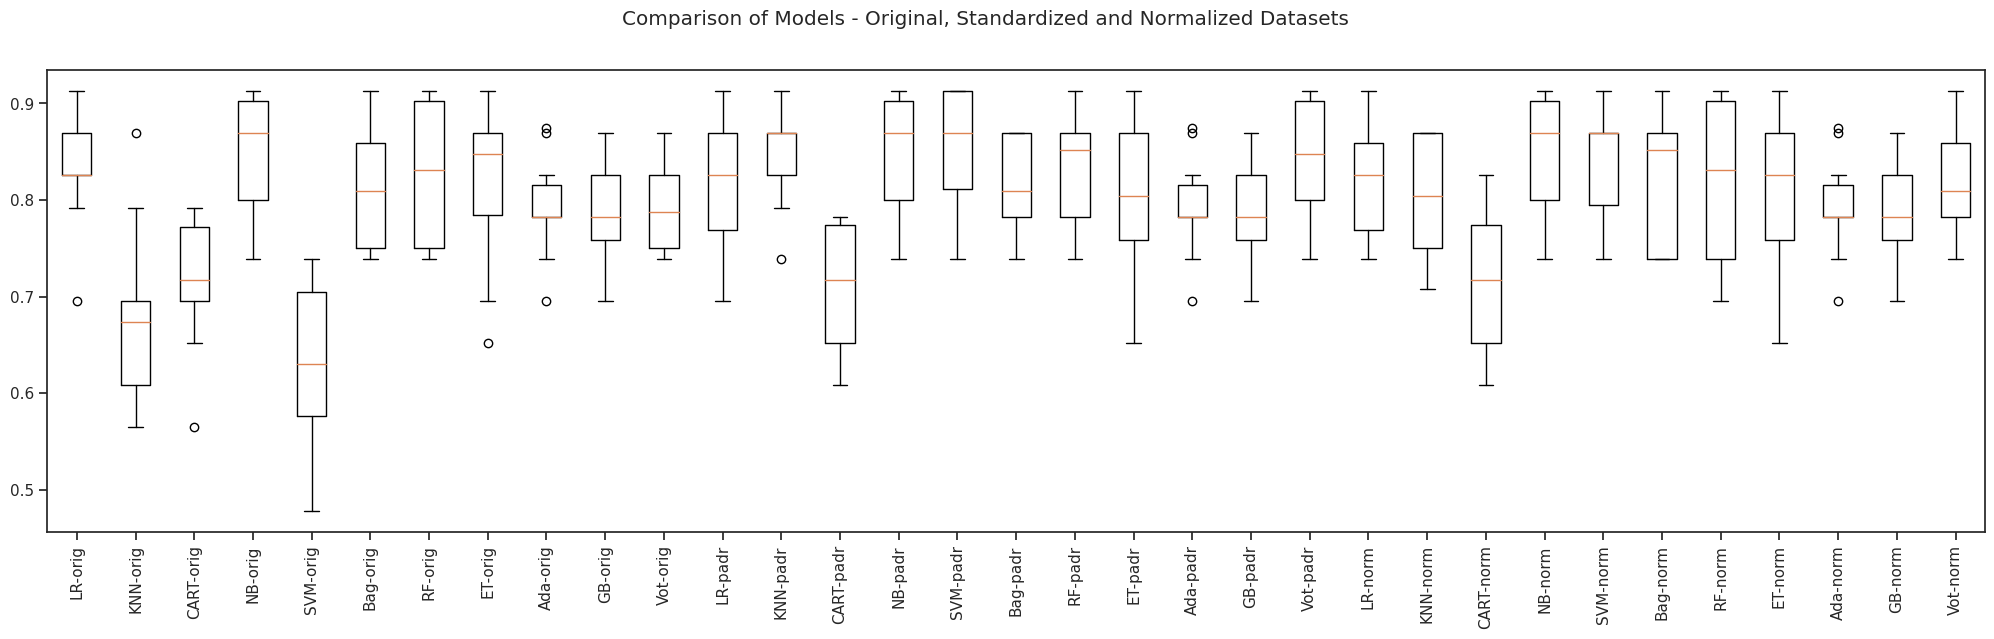

In [315]:
np.random.seed(seed) # defining a global seed

# Lists to store the pipeplines and their results
pipelines = []
results = []
names = []

base = DecisionTreeClassifier()
num_trees = 100
max_features = 6

# Creating VotingClassifier models
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Creating the pipeline elements

# Algorithms to be applied
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformations to be applied
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Building up the pipelines

# Original Dataset
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Standardized Dataset
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Normalized Dataset (minimizing errors and inconsistencies)
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executing the pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatting for 3 decimals
    print(msg)

# Boxplot - Comparison of Models
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparison of Models - Original, Standardized and Normalized Datasets')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

During this algorithm exploration, NB once again has shown the best performance both in original and normalized data, displaying the same accuracy: 84.9%. Although SVM did not perform well with the original data, it has improved its accuracy both at standardized and normalized data at 85.7% and 84.4%, respectively; and LR shows 83.1% accuracy in the original data.

## 6.3 Hyperparameters Optimization

Based on the previous results, NB (Naïve Bayes) delivered the best results. It performed well even after normalization. Also, SVM and LR algorithms have displayed great performance as stated in item 6.2.

NB is an algorithm that assumes all the features are independent and often gets an odd result due to the variable 0 (zero) in the dataset. Because NB is difficult to tune, we would have to re-train the model or wait for new data availability.

For this reason and for the limited time frame of this project, we will observe the hyperparameters tuning on SVM and LG, using Grid Search Library.

In [316]:
# SVM Tuning
np.random.seed(seed) # defining a global seed

pipelines = []

# Defining the pipeline components
svc = ('SVC', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('svc-orig', Pipeline(steps=[svc])))
pipelines.append(('svc-padr', Pipeline(steps=[standard_scaler, svc])))
pipelines.append(('svc-norm', Pipeline(steps=[min_max_scaler, svc])))

param_grid = {
    'SVC__C': [0.1, 1, 10],
    'SVC__kernel': ['linear', 'rbf'],
    'SVC__gamma': ['scale', 'auto']
}

# Fitting the model for GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # print out the best config
    print("Without treating the missings: %s - Best: %f using %s" % (name, grid.best_score_, grid.best_params_))

Without treating the missings: svc-orig - Best: 0.844384 using {'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}
Without treating the missings: svc-padr - Best: 0.857428 using {'SVC__C': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}
Without treating the missings: svc-norm - Best: 0.848732 using {'SVC__C': 10, 'SVC__gamma': 'auto', 'SVC__kernel': 'rbf'}


In [317]:
# LR Tuning
np.random.seed(seed) # defining a global seed

pipelines = []

# Defining the pipeline components
LR = LogisticRegression()

LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

pipelines.append(('lr-orig', Pipeline(steps=[LR])))
pipelines.append(('lr-padr', Pipeline(steps=[standard_scaler, LR])))
pipelines.append(('lr-norm', Pipeline(steps=[min_max_scaler, LR])))


# Fitting the model for grid search

for name, model in pipelines:
    grid = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)
    grid.fit(X_train, y_train)


# print out the best config
print("Without treating the missings: %s - Best: %f using %s" % (name, grid.best_score_, grid.best_params_))

Streaming output truncated to the last 5000 lines.
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.745 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.783 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.826 total time=   0.0s
[CV 4/5] END 

## 6.4 Model Finalization

From the models above, there is not problem with overfitting, NB stayed the same as no optimization was done and SVM has not presented significant improvement.<br>
<br>
However, if we take a closer look at LR, we will observe that using 'C': 0.1 with a 'penalty': l2, normalized data improved greatly to 84.9%, and therefore we will evaluate this model with all the test set available. As seen as follows, the model reached 81%, which is not as good as in our previous evaluation but appears similarly in LR for normalization and it is within the acceptable threshold to be considered a good metric.

In [318]:
# Model Evaluation with the test set

# Model preparation
scaler = StandardScaler().fit(X_train) # training set scaler adjustment
rescaledX = scaler.transform(X_train) # training set standardization
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Accuracy estimation of test set
rescaledTestX = scaler.transform(X_test) # test set standardization
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8103448275862069


Now we are setting up the model with the entire dataset for production.

In [319]:
# Setting up the model with the entire dataset
scaler = StandardScaler().fit(X) # entire dataset scaler adjustment
rescaledX = scaler.transform(X) # entire dataset standardization
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## 6.5 Prediction for Unseen Data

At last, we will predict the application of the model on unseen data, considering three new instances, with unknown output classes.

This new model is trained and executed to predict the classes, where the data will be previously standardized using 'data scaler' as in the trained data used before.

In [320]:
# New data - class unknown
data = {'age':  [39, 47, 67],
        'sex': [0, 1, 0],
        'cp': [3, 1, 2],
        'trestbps': [104, 120, 140],
        'chol': [207, 246, 564],
        'fbs': [0, 1, 0],
        'restecg': [0, 2, 1],
        'thalach': [130, 159, 190],
        'exang': [0, 1, 0],
        'oldpeak': [0.0, 1.4, 2.0],
        'slope': [0, 1, 0],
        'ca': [0, 1, 0],
        'thal': [0, 2, 1],
        }

attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input = pd.DataFrame(data, columns=attributes)

array_input = input.values
X_input = array_input[:,0:13].astype(float)

# Input data scaler standardization in X
rescaledInputX = scaler.transform(X_input)
print(rescaledInputX)

[[-1.694 -1.44   0.886 -1.559 -0.777 -0.407 -1.018 -1.01  -0.689 -0.893
  -0.96  -0.708 -0.866]
 [-0.813  0.694 -1.179 -0.659 -0.03   2.459  0.997  0.371  1.452  0.299
   0.662  0.358  1.229]
 [ 1.39  -1.44  -0.146  0.466  6.061 -0.407 -0.01   1.847 -0.689  0.81
  -0.96  -0.708  0.181]]


In [321]:
# Class Prediction for input data
output = model.predict(rescaledInputX)
print(output)

[0. 1. 0.]


By the output data shown above for the three instances, we can infer that the results lean towards 'no heart disease', 'heart disease' and 'no heart disease'.

# 7.0 Conclusion

In this project we have looked at the medical history of individuals / patients to predict if the features in the data can lead or not to heart disease.

<br>

For the prediction to be as accurate as possible, we've initially used the feature selection methods and reduced the number of features to the 6 most relevant ones.

<br>

Later on, we've developed modeling and inference using cross-validation to train and evaluate the models with the accuracy metric. Our best performers were NB, SVM and LR. Since NB has very limited hyperparameters, the optimization should be done by tweaking other phases of the analysis, which was not done in this project due to the short amount of time available.

<br>

The hyperparameters optimization was performed to see if there was room for some more improvement. SVM did not show improvement and LR did display higher performance on normalized data, if compared to the previous result. Therefore, LR was chosen for implementation.

<br>

Through the test set, the achieved accuracy of 81.03 for LR was not as high as expected but still within the good metric threshold.

<br>

At last, a prediction on the application of the model on unseen data was carried out, considering three new instances. Those instances returned consistent output results, which have taken into account the presence or absence of heart disease in individuals / patients.

# 8.0 Further Considerations



*   The dataset is used as binary classification to simplify the training and reduce complexity of the model. I would suggest the dataset to be treated as a multi-class classification problem due to its various classes if time were allowed.
<br>

*   The correlation matrix presents variables with somehow high relationships to each other. Perhaps by combining two variables (e.g. 'oldpeak' and 'slope'), a new combined variable could be a new source of experimentation.




